In [234]:
import torch

from src.utils.dataset.cifar_data import data_split
from torchvision import transforms

from skimage.util import random_noise

from torchvision import transforms


In [235]:
USE_GPU = True

TRAIN_BATCH_SIZE = 64
VAL_BATCH_SIZE = 128
TEST_BATCH_SIZE = 100

RANDOM_STATE = 42

DEVICE = "cuda" if USE_GPU and torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


In [236]:
datasets, loaders = data_split(
    TRAIN_BATCH_SIZE,
    VAL_BATCH_SIZE,
    TEST_BATCH_SIZE,
    train_transforms=None,
    test_transforms=None,
    val_size=0.15,
    download=True,
    random_state=RANDOM_STATE
)

Files already downloaded and verified
Files already downloaded and verified


In [237]:
image = datasets['train'].images[1]

In [238]:
# train_transforms = transforms.Compose(
#     [
#         transforms.Resize((32, 32)),
#         transforms.RandomGrayscale(p=0.15),
#         transforms.RandomResizedCrop(32, scale=(0.25, 1.0), ratio=(1.0, 1.0)),
#         transforms.RandomHorizontalFlip(p=0.5),
#         transforms.RandomRotation(20),
#         transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
#         transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
#         transforms.ToTensor(),
#         #transforms.RandomApply([GaussianNoise(0.0, 0.1)], p=0.25),
#         transforms.RandomApply([PepperNoise(amount=0.1)], p=0.8),
#         transforms.Normalize(MEAN, STD)
#     ]
# )

In [239]:
class GaussianNoise(object):
  def __init__(self, mean=0, std=1):
    self.mean = mean
    self.std = std

  def __call__(self, tensor):
    return tensor + torch.randn(tensor.size()) * self.std + self.mean

  def __repr__(self):
    return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)


class PepperNoise(object):
    def __init__(self, amount=0.1):
        self.amount = amount
    
    def __call__(self, tensor):
        return torch.tensor(random_noise(tensor, mode='pepper', amount=self.amount))

    def __repr__(self):
        return self.__class__.__name__ + '(amount={0})'.format(self.amount)

In [240]:
MEAN = (0.5, 0.5, 0.5)
STD = (0.5, 0.5, 0.5)

In [241]:
trans = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomGrayscale(p=0.15),
        transforms.RandomResizedCrop(224, scale=(0.25, 1.0), ratio=(1.0, 1.0)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(20),
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),

        transforms.ToTensor(),

        transforms.Normalize(MEAN, STD),
        transforms.RandomApply([GaussianNoise(0, 0.05)], p=1),

        transforms.ToPILImage()
        
    ]
)

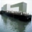

In [233]:
image

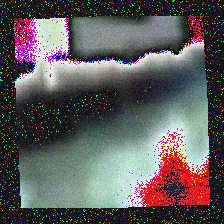

In [231]:
trans(image)

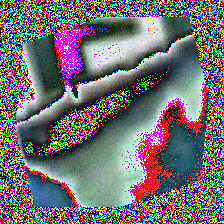

In [232]:
trans(image)

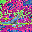

In [206]:
trans(image)